# protostars
## 02- `Star_veil.py` experiment 1
### I. Examine the MCMC output

We have successfully run `Starfish` with the `Star_veil.py` code.

In [1]:
import pandas as pd
from matplotlib.ticker import MaxNLocator
import corner

In [2]:
! tree ../sf/exp1/output/

../sf/exp1/output/
└── veil1
    └── run01
        ├── config.yaml
        ├── emcee_chain.npy
        ├── models_ff-05_50_95.csv
        ├── plots
        ├── s0_o0
        └── s0_o0phi.json

4 directories, 4 files


The `emcee_chain.npy` file contains the 5000 x 40 MCMC samples from this run.

In [3]:
ws = np.load("../sf/exp1/output/veil1/run01/emcee_chain.npy")

In [4]:
burned = ws[:, 4000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [5]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"veiling", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

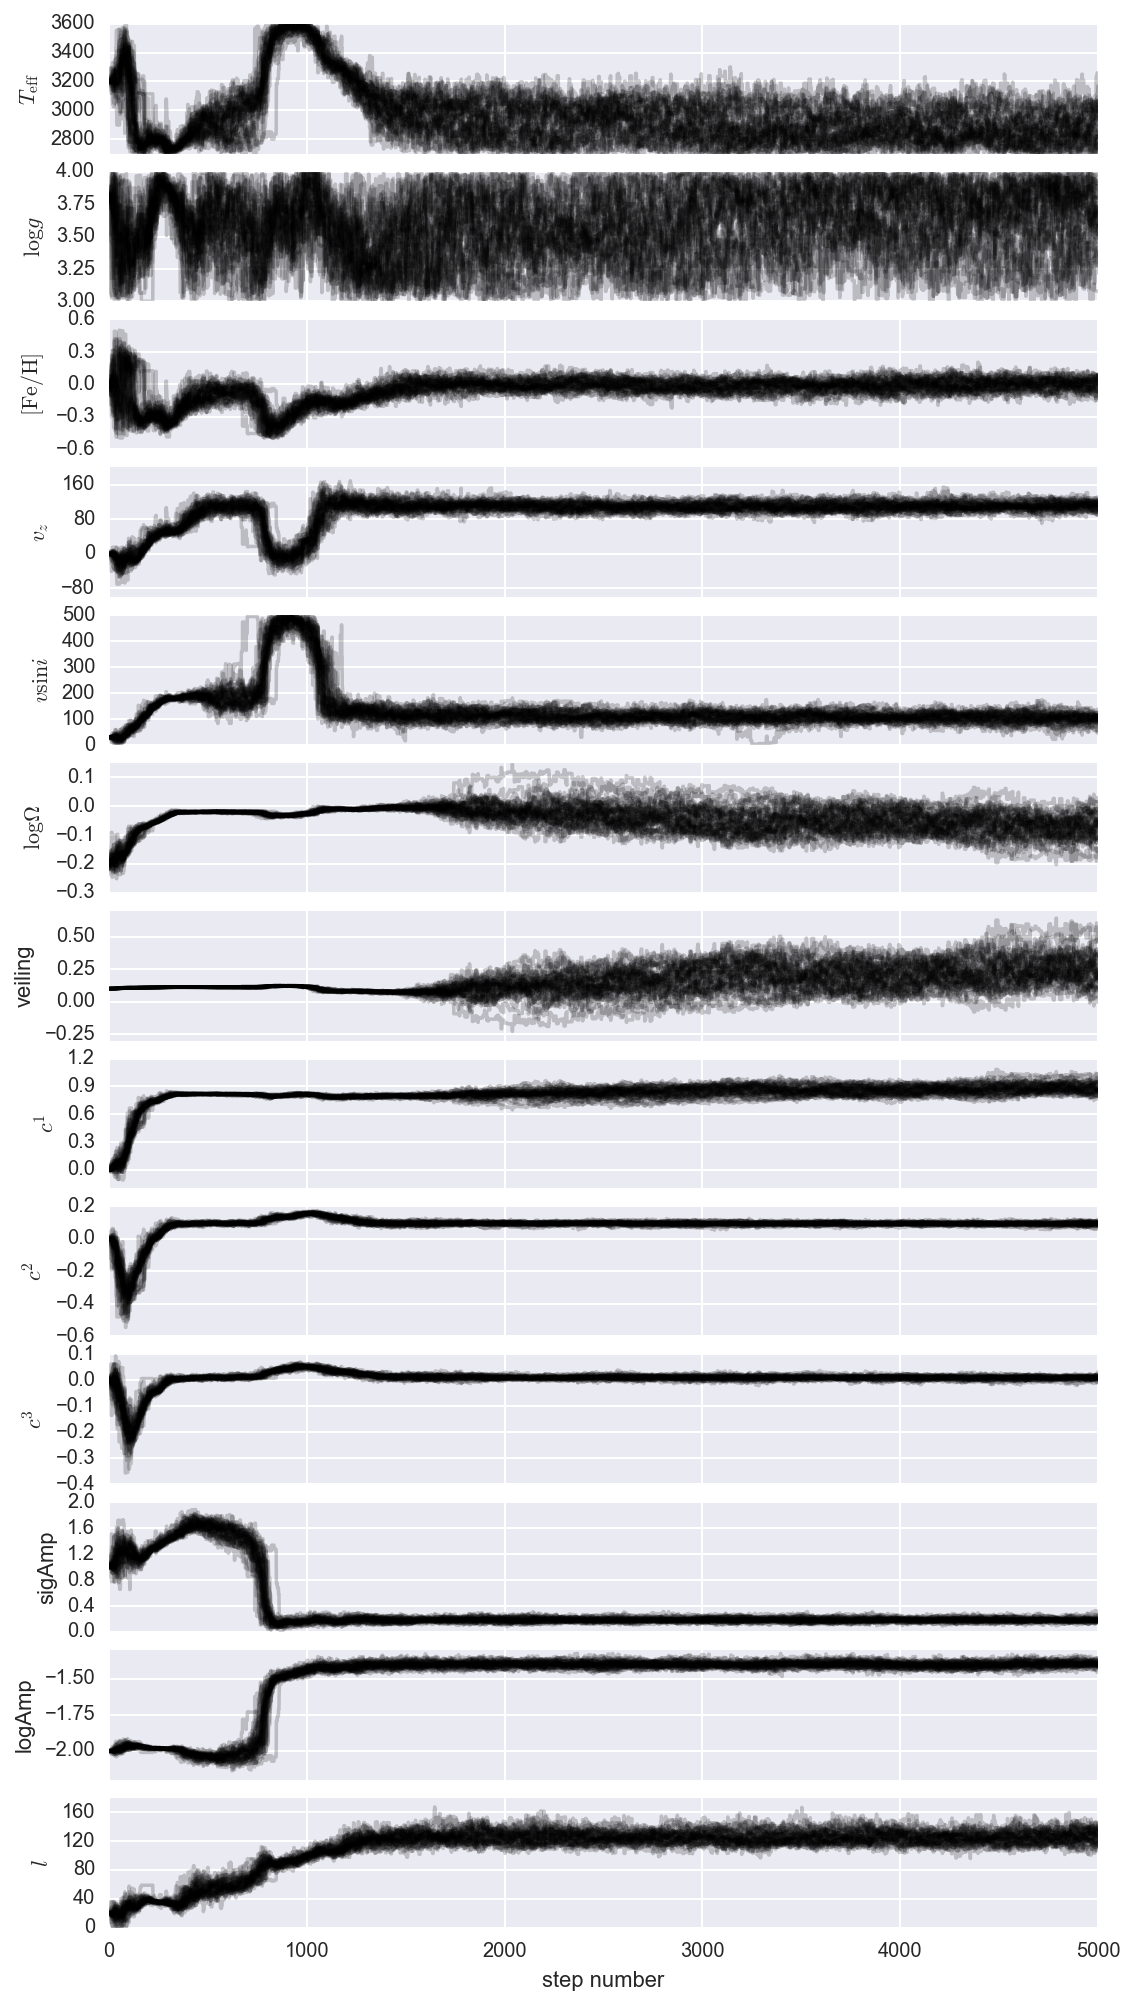

In [6]:
fig, axes = plt.subplots(13, 1, sharex=True, figsize=(8, 14))
for i in range(0, 13, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[12].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

The chain passes the *by-eye* check for burn-in.

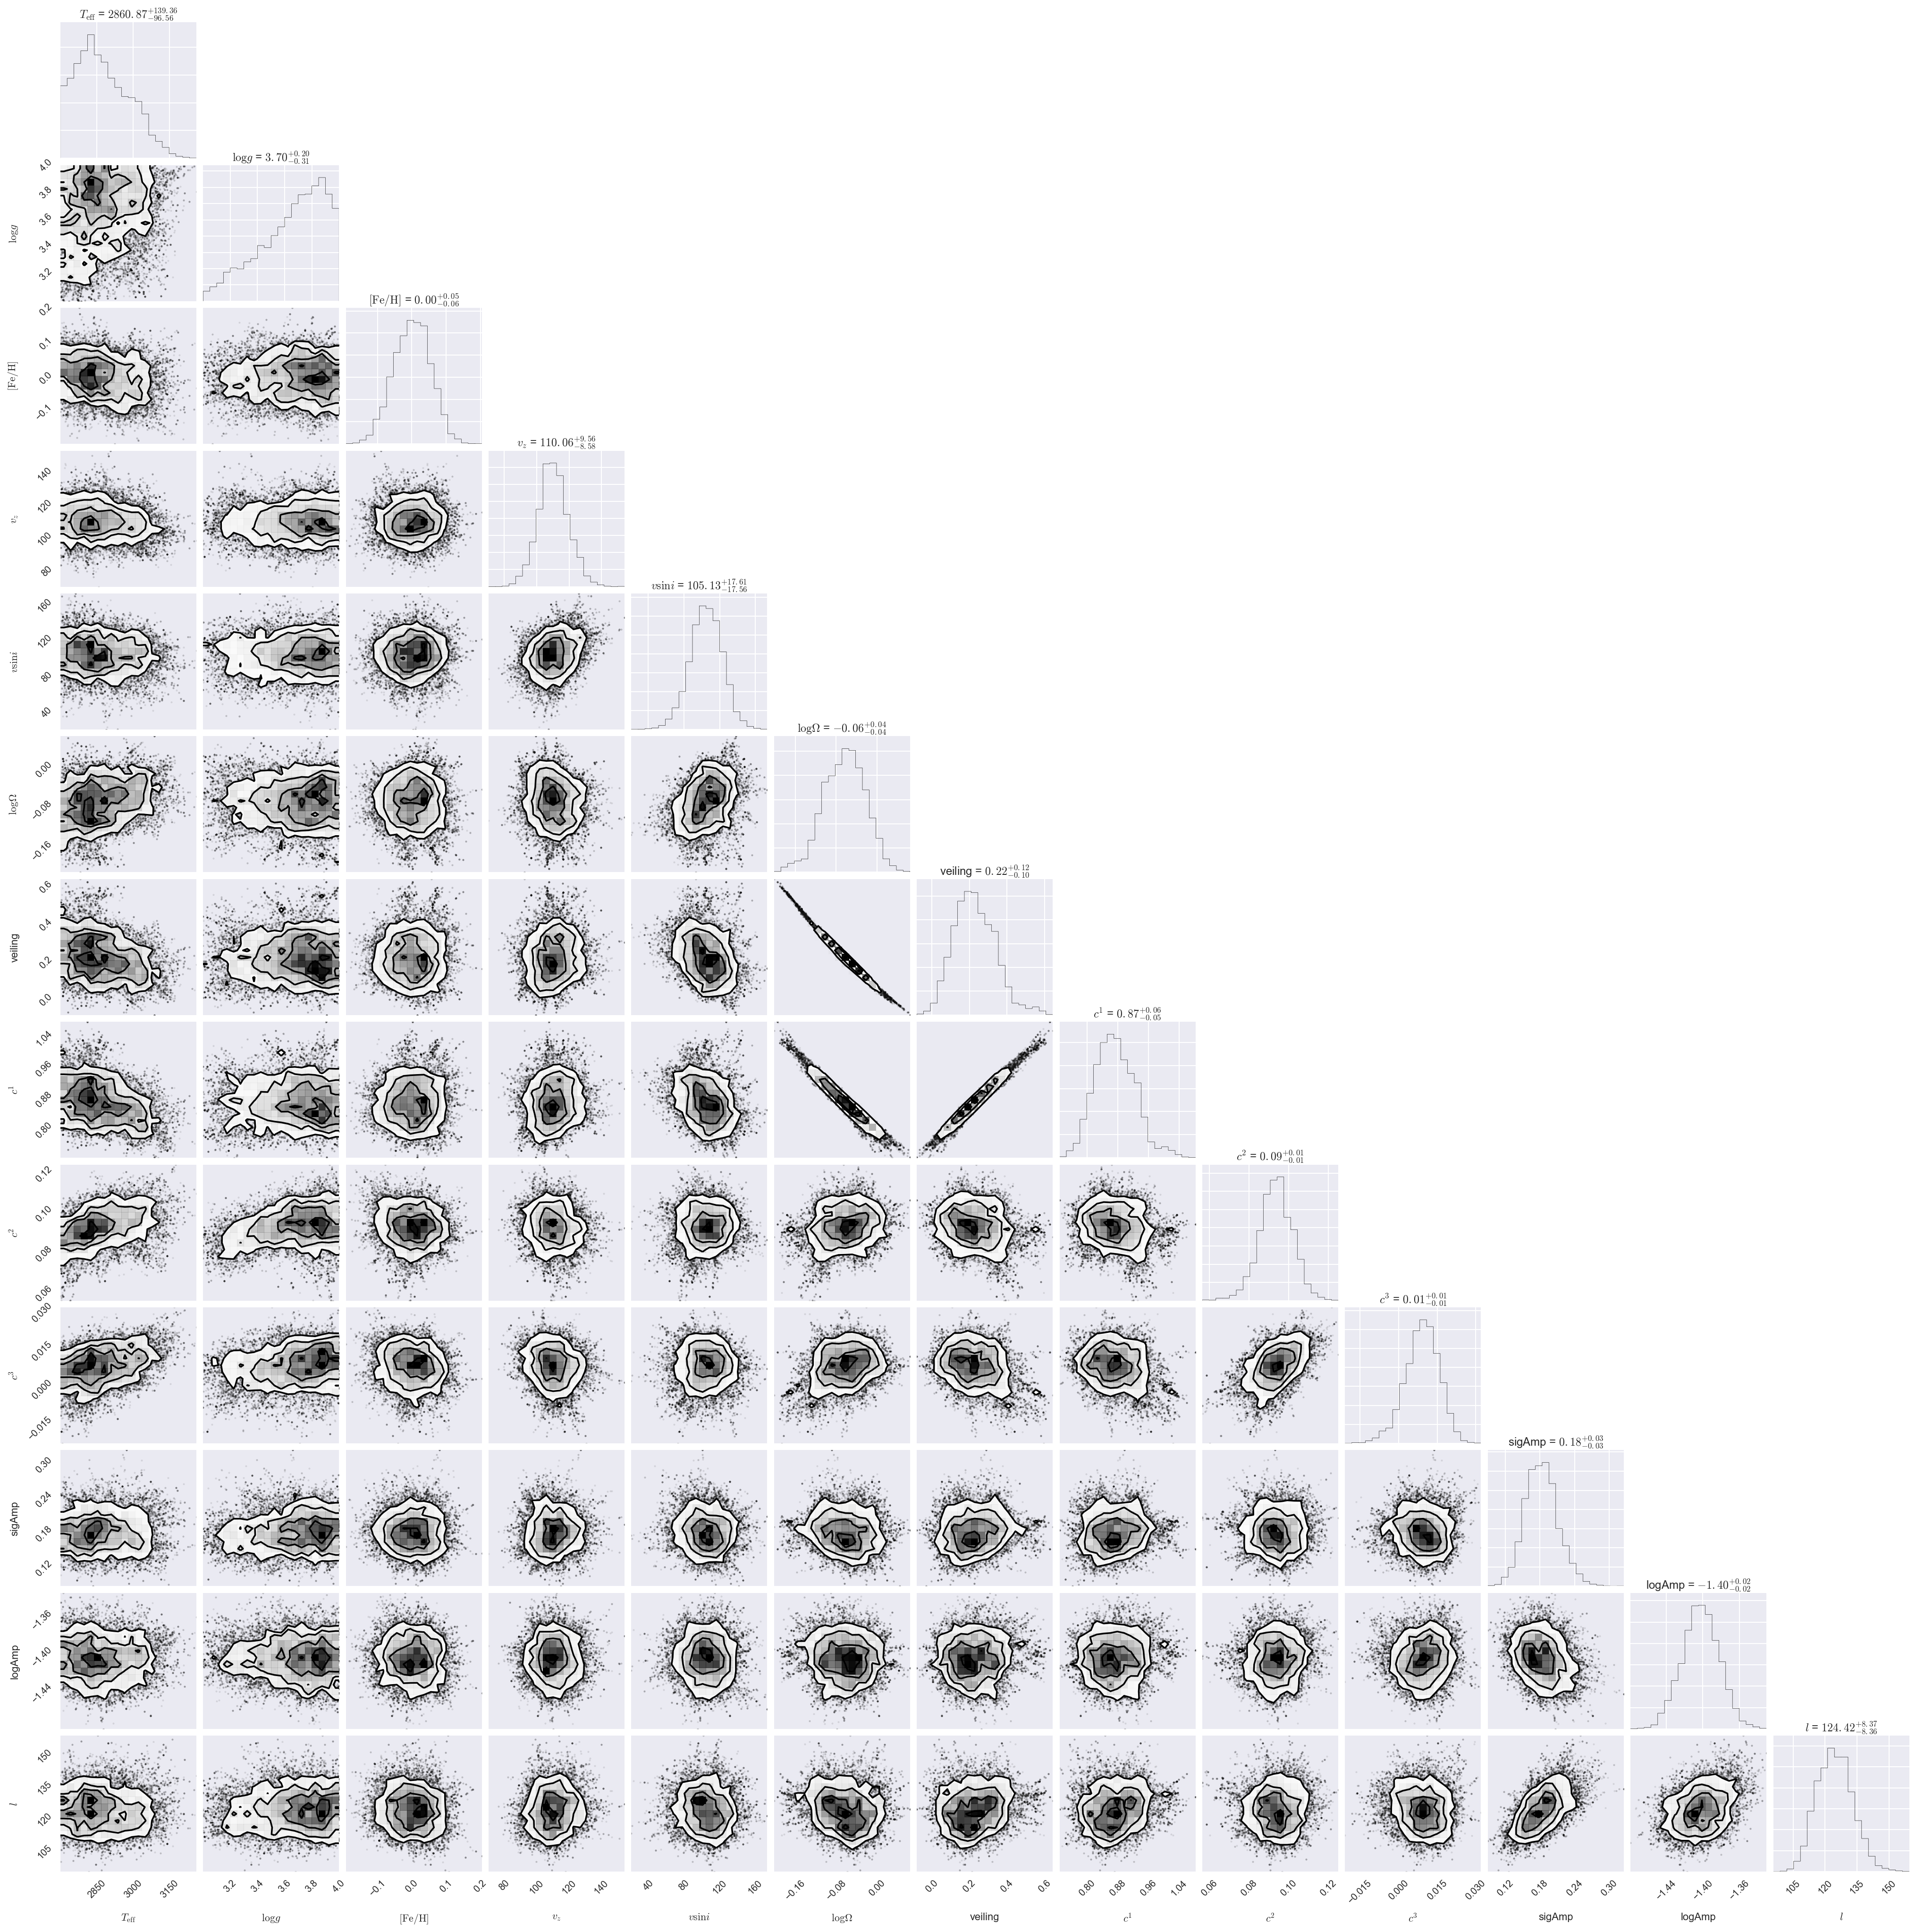

In [7]:
fig = corner.corner(fc, labels=label, show_titles=True)
fig.savefig('../star_veil_exp1_corner.png', dpi=300)

The `veiling` value is strongly correlated with the stellar photosphere solid angle and the `c^1` Chebyshev polynomial, which makes sense.

In [8]:
nplabel = np.array(label)

In [9]:
shorter = [0,1,6]

In [10]:
label_short = nplabel[shorter]
fcs = fc[:, [0,1,6]]

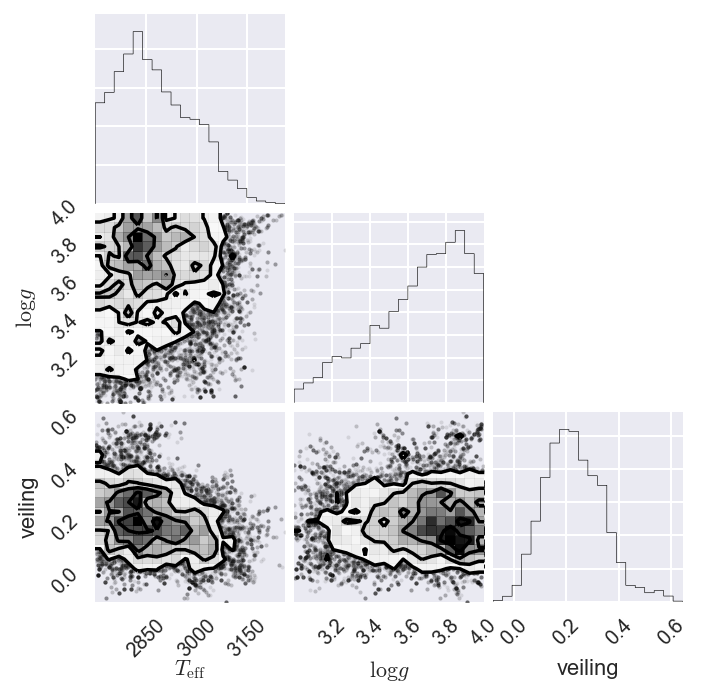

In [11]:
fig = corner.corner(fcs, labels=label_short)
fig.set_size_inches(5, 5)
fig.savefig('../plots/short_parameter_corner.pdf')

$\Delta v / c = \Delta \lambda / \lambda$  
$\Delta v = 1/R \cdot c$  
$\Delta v = 1/1250 \cdot 3.0\times10^5$ km/s

In [12]:
1.0/1250.0*3E5

240.0

240 km/s per resolution element

So the $v_z$ is within one resolution element, as is the $v\sin{i}$.  There should not be a symmetric constraint on $v\sin{i}$-- we probably have the instrumental resolution slightly wrong, since I just guessed what to put in the `FWHM` field in the Starfish instrument class.  We also have a prior on $v_z$, which gives it a tighter appearance than one would expect, and also biases the posterior.

### Examine draws from the posterior in data-space
*i.e.* "look at the the Spectral models"

Run `plot_veil_model.py`

In [13]:
draws = pd.read_csv('../sf/exp1/output/veil1/run01/models_ff-05_50_95.csv')

In [14]:
sns.set_context('paper')

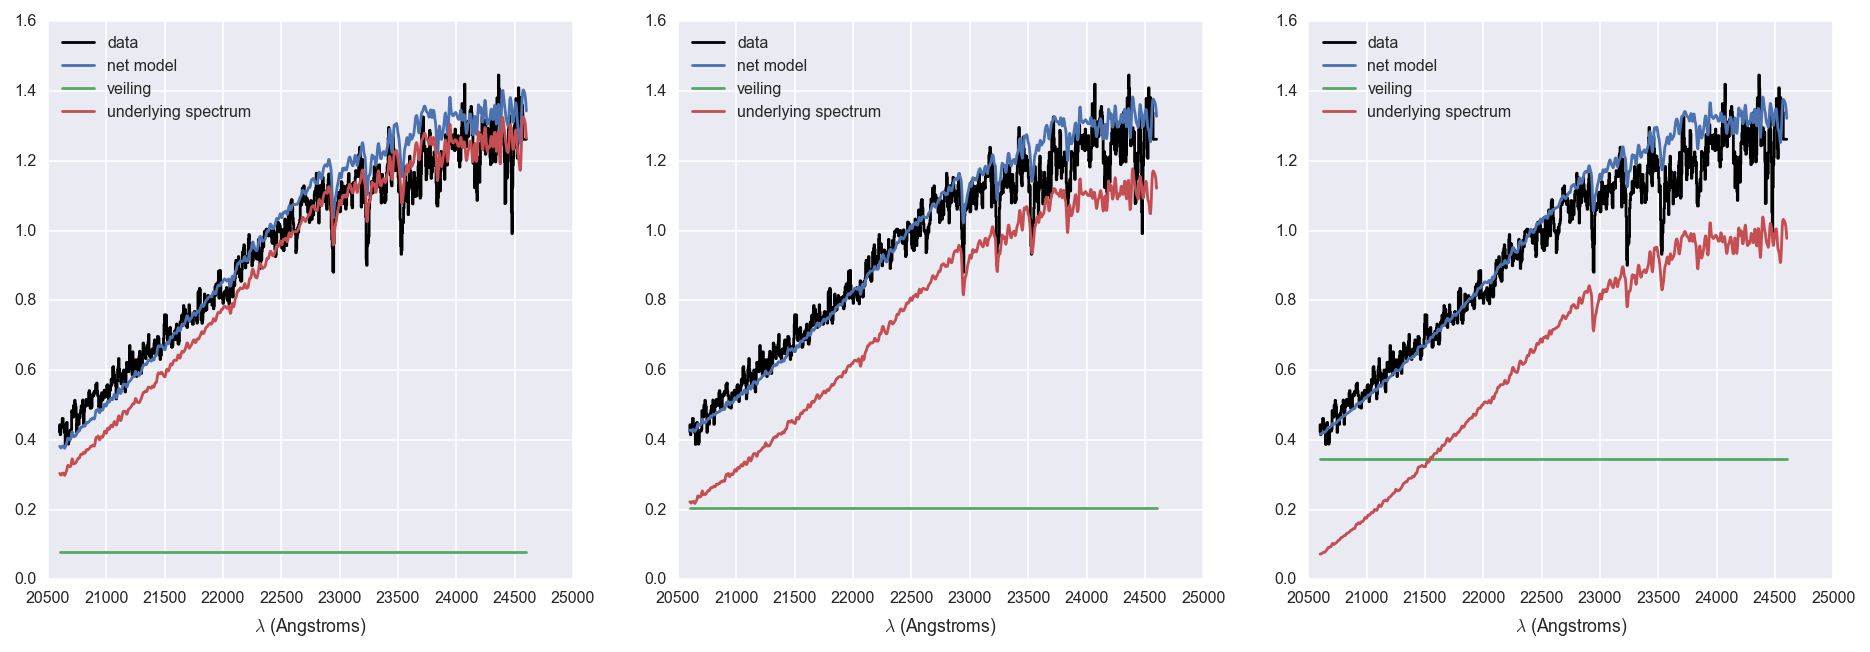

In [15]:
plt.figure(figsize=(16, 5))
plt.subplot('131')
plt.step(draws.wl, draws.data, 'k')
plt.plot(draws.wl, draws.model_comp05, label = 'net model')
plt.plot(draws.wl, draws.model_cool05, label = 'veiling')
plt.plot(draws.wl, draws.model_hot05, label = 'underlying spectrum')
plt.xlabel('$\lambda$ (Angstroms)')
plt.ylim(0,1.6)
plt.legend(loc='best')
plt.subplot('132')
plt.step(draws.wl, draws.data, 'k')
plt.plot(draws.wl, draws.model_comp50, label = 'net model')
plt.plot(draws.wl, draws.model_cool50, label = 'veiling')
plt.plot(draws.wl, draws.model_hot50, label = 'underlying spectrum')
plt.xlabel('$\lambda$ (Angstroms)')
plt.ylim(0,1.6)
plt.legend(loc='best')
plt.subplot('133')
plt.step(draws.wl, draws.data, 'k')
plt.plot(draws.wl, draws.model_comp95, label = 'net model')
plt.plot(draws.wl, draws.model_cool95, label = 'veiling')
plt.plot(draws.wl, draws.model_hot95, label = 'underlying spectrum')
plt.xlabel('$\lambda$ (Angstroms)')
plt.ylim(0,1.6)
plt.legend(loc='best')
plt.savefig('../plots/gully_Class0_triptych.pdf')

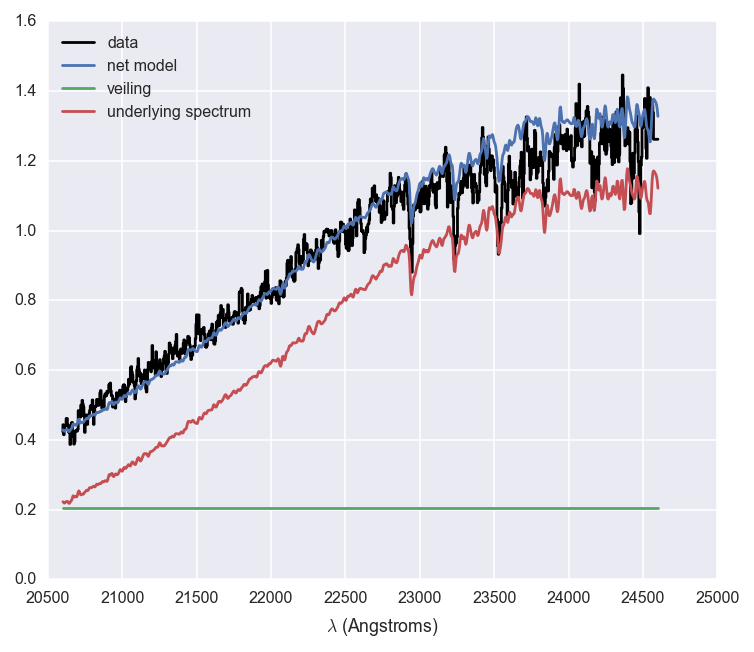

In [16]:
plt.figure(figsize=(6, 5))
plt.step(draws.wl, draws.data, 'k')
plt.plot(draws.wl, draws.model_comp50, label = 'net model')
plt.plot(draws.wl, draws.model_cool50, label = 'veiling')
plt.plot(draws.wl, draws.model_hot50, label = 'underlying spectrum')
plt.xlabel('$\lambda$ (Angstroms)')
plt.ylim(0,1.6)
plt.legend(loc='best')
plt.savefig('../plots/gully_Class0_just_one_plot.pdf')

Looks reasonable.